# Panda Robotic Arm - Reach

In [1]:
import numpy as np
import gymnasium as gym
import panda_gym
import matplotlib.pyplot as plt

from td3_algo import TD3Trainer

* Robot: Simulates the Franka Emika Panda robotic arm for manipulation tasks.
<br>

* Observation Space:
    - All tasks include gripper position and velocity (6 values).
    - Tasks involving objects include their position, orientation, and velocities (linear and rotational, 12 values per object).
    - Gripper opening (distance between fingers) is included if not constrained closed (1 value).

* Action Space:
    - Gripper movement commands (3 values for x, y, and z axes).
    - Gripper opening/closing command (1 value).
    
* Simulation Details:
    - Simulation runs 20 timesteps per agent action (2ms each).
    - Overall interaction frequency is 25Hz.
    - Most tasks have episodes lasting 2 seconds (50 interactions).
    
* Reward Function:
    - Default reward is sparse: 0 for successful completion (within 5cm tolerance), -1 otherwise.
    - Sparse rewards are simpler to define but lack information on progress.

## PandaReach-v3

* Task: A target position must be reached with the gripper. This target position is randomly generated in a volume of 30 cm × 30 cm × 30 cm

In [2]:
env = gym.make(
    "PandaReach-v3",
    render_mode="rgb_array",
    renderer="OpenGL",
    render_target_position=[0, 0.15, 0.25],
    render_distance=0.85,
    render_yaw=135,
    render_pitch=-20,
)

pybullet build time: Nov 28 2023 23:45:17



Observation Space: Dict('achieved_goal': Box(-10.0, 10.0, (3,), float32), 'desired_goal': Box(-10.0, 10.0, (3,), float32), 'observation': Box(-10.0, 10.0, (6,), float32))

Action Space:  Box(-1.0, 1.0, (3,), float32)

Initial State:  ({'observation': array([ 3.8439669e-02, -2.1944723e-12,  1.9740014e-01,  0.0000000e+00,
       -0.0000000e+00,  0.0000000e+00], dtype=float32), 'achieved_goal': array([ 3.8439669e-02, -2.1944723e-12,  1.9740014e-01], dtype=float32), 'desired_goal': array([0.05887147, 0.14742559, 0.27024904], dtype=float32)}, {'is_success': array(False)})

A step in the environment:  ({'observation': array([0.05612974, 0.02471757, 0.20918499, 0.54309   , 1.1585152 ,
       0.51952785], dtype=float32), 'achieved_goal': array([0.05612974, 0.02471757, 0.20918499], dtype=float32), 'desired_goal': array([0.05887147, 0.14742559, 0.27024904], dtype=float32)}, -1.0, False, False, {'is_success': False})


Rendered Environment: 


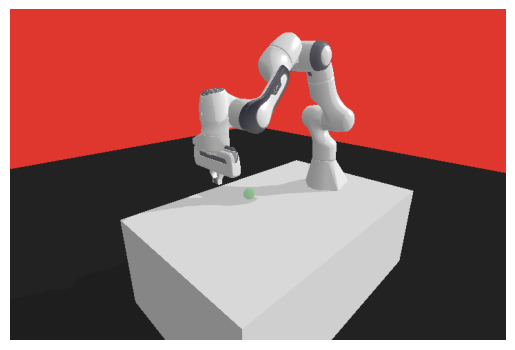

In [3]:
print('\nObservation Space:', env.observation_space)
print('\nAction Space: ', env.action_space)
print('\nInitial State: ',env.reset())
print('\nA step in the environment: ', env.step(np.array(1.0)))
print('\n\nRendered Environment: ')
env.reset()
plt.axis('off')
plt.imshow(env.render())
plt.show()

# Training

In [7]:
obs_shape = env.observation_space['observation'].shape[0] + \
            env.observation_space['achieved_goal'].shape[0] + \
            env.observation_space['desired_goal'].shape[0]

expert = TD3Trainer(env=env, input_dims=obs_shape, agent_name='expert', model_save_path='../Data/Expert/')

Training..:   0%|                               | 1/500 [00:00<01:03,  7.88it/s]

Episode: 0 	 Steps: 50 	 Score: -50.0 	 Average score: -50.0


Training..:  20%|█████▊                       | 101/500 [00:16<01:01,  6.49it/s]

Episode: 100 	 Steps: 4 	 Score: -3.0 	 Average score: -38.7


Training..:  40%|███████████▋                 | 202/500 [00:28<00:24, 12.13it/s]

Episode: 200 	 Steps: 4 	 Score: -3.0 	 Average score: -21.9


Training..:  60%|█████████████████▌           | 302/500 [00:36<00:16, 12.19it/s]

Episode: 300 	 Steps: 2 	 Score: -1.0 	 Average score: -2.2


Training..:  80%|███████████████████████▎     | 402/500 [00:42<00:06, 14.51it/s]

Episode: 400 	 Steps: 3 	 Score: -2.0 	 Average score: -1.9


Training..: 100%|█████████████████████████████| 500/500 [00:49<00:00, 10.02it/s]


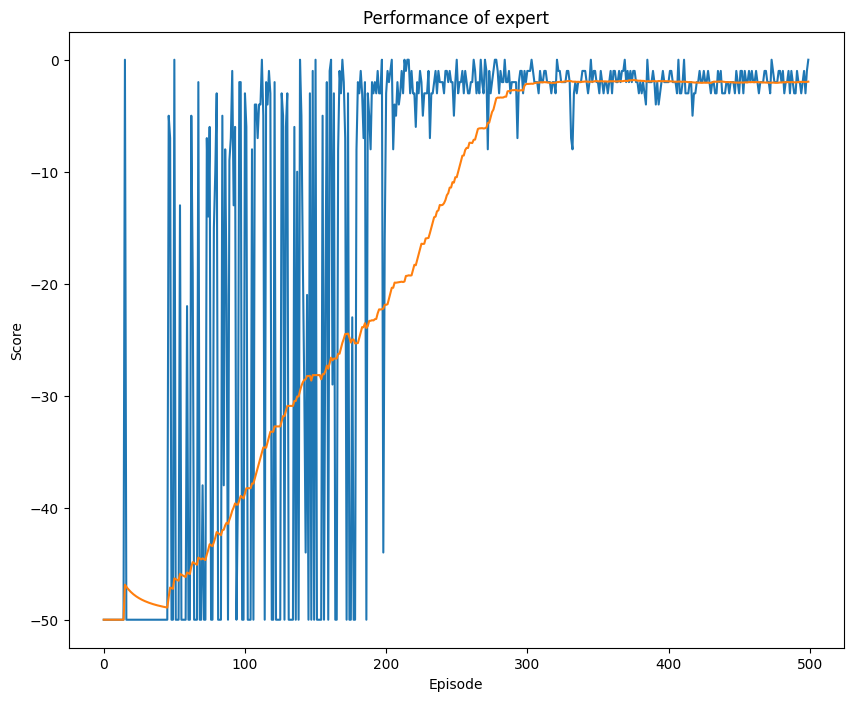

In [8]:
score_history, avg_score_history = expert.td3_train(n_episodes=500, opt_steps=10, print_every=100, 
                                                    plot_save_path='../Results/Expert Performance.png')

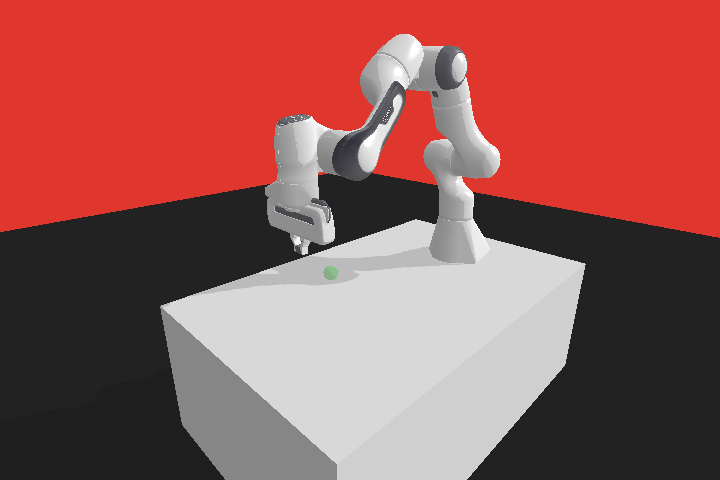

Expert Reward:  -2.0


In [9]:
expert_reward = expert.test_model(env=env, render_save_path='../Results/Expert Policy', fps=5)
print('Expert Reward: ', expert_reward)